In [1]:
getwd()

[1] "C:/Users/rpgen/Documents/CS424/project3/bigYellowTaxi"

In [2]:
#READ CSV FILE AND CONVERT TO ONE DATA FRAME
col_name <- c("","Trip.Start.Timestamp","Trip.Seconds","Trip.Miles","Pickup.Community.Area","Dropoff.Community.Area","Company")
setwd("/Users/rpgen/Documents/CS424/project3/bigYellowTaxi/Data")
myfiles <- list.files(pattern="*.csv", full.names=TRUE)
myfiles
data <- do.call(rbind, lapply(myfiles, read.csv, header = FALSE))
colnames(data) <- col_name



[1] "./modified_taxi_partaa.csv" "./modified_taxi_partab.csv"
 [3] "./modified_taxi_partac.csv" "./modified_taxi_partad.csv"
 [5] "./modified_taxi_partae.csv" "./modified_taxi_partaf.csv"
 [7] "./modified_taxi_partag.csv" "./modified_taxi_partah.csv"
 [9] "./modified_taxi_partai.csv" "./modified_taxi_partaj.csv"
[11] "./modified_taxi_partak.csv" "./modified_taxi_partal.csv"
[13] "./modified_taxi_partam.csv" "./modified_taxi_partan.csv"
[15] "./modified_taxi_partao.csv" "./modified_taxi_partap.csv"
[17] "./modified_taxi_partaq.csv"

In [3]:
data

,Trip.Start.Timestamp,Trip.Seconds,Trip.Miles,Pickup.Community.Area,Dropoff.Community.Area,Company
<int>,<chr>,<int>,<dbl>,<int>,<int>,<chr>
19,01/01/2019 12:00:00 AM,1260,0.6,77,28,Blue Ribbon Taxi Association Inc.
21,01/01/2019 12:00:00 AM,360,0.8,8,8,Taxi Affiliation Services
23,01/01/2019 12:00:00 AM,360,1.0,8,8,Taxi Affiliation Services
24,01/01/2019 12:00:00 AM,420,0.8,8,8,"Taxicab Insurance Agency, LLC"
25,01/01/2019 12:00:00 AM,180,0.7,77,4,Taxi Affiliation Services
26,01/01/2019 12:00:00 AM,960,0.6,28,32,Taxi Affiliation Services
29,01/01/2019 12:00:00 AM,540,1.0,32,8,Choice Taxi Association
32,01/01/2019 12:00:00 AM,1800,3.2,32,8,Star North Management LLC
33,01/01/2019 12:00:00 AM,1560,14.3,76,8,Top Cab Affiliation


In [4]:
library(lubridate)

n_date <- parse_date_time(data$Trip.Start.Timestamp,
                orders = 'mdY IMS %p', truncated = 3) #PARSE DATE FROM TIME STAMP
data$new_date <- n_date
data$Hour <- hour(data$new_date)
data


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




,Trip.Start.Timestamp,Trip.Seconds,Trip.Miles,Pickup.Community.Area,Dropoff.Community.Area,Company,new_date,Hour
<int>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<dttm>,<int>
19,01/01/2019 12:00:00 AM,1260,0.6,77,28,Blue Ribbon Taxi Association Inc.,2019-01-01,0
21,01/01/2019 12:00:00 AM,360,0.8,8,8,Taxi Affiliation Services,2019-01-01,0
23,01/01/2019 12:00:00 AM,360,1.0,8,8,Taxi Affiliation Services,2019-01-01,0
24,01/01/2019 12:00:00 AM,420,0.8,8,8,"Taxicab Insurance Agency, LLC",2019-01-01,0
25,01/01/2019 12:00:00 AM,180,0.7,77,4,Taxi Affiliation Services,2019-01-01,0
26,01/01/2019 12:00:00 AM,960,0.6,28,32,Taxi Affiliation Services,2019-01-01,0
29,01/01/2019 12:00:00 AM,540,1.0,32,8,Choice Taxi Association,2019-01-01,0
32,01/01/2019 12:00:00 AM,1800,3.2,32,8,Star North Management LLC,2019-01-01,0
33,01/01/2019 12:00:00 AM,1560,14.3,76,8,Top Cab Affiliation,2019-01-01,0


In [5]:
#Aggregate by day
noFilter_byDay <- aggregate(data[,1], by=list(date(data$new_date)), FUN=length)
colnames(noFilter_byDay) <- c("Date", "Rides")
noFilter_byDay

Date,Rides
<date>,<int>
2019-01-01,19110
2019-01-02,24055
2019-01-03,28028
2019-01-04,29721
2019-01-05,19212
2019-01-06,18148
2019-01-07,28792
2019-01-08,30730
2019-01-09,35747


In [6]:
#Aggregate by hour
noFilter_byHour <- aggregate(data[,1], by=list(data$Hour), FUN=length)
colnames(noFilter_byHour) <- c("Hour", "Rides")
noFilter_byHour

Hour,Rides
<int>,<int>
0,247076
1,192008
2,147402
3,112595
4,87146
5,91697
6,159737
7,340740
8,533624


In [7]:
#Aggregate by weekday
noFilter_byDayOfWeek <- aggregate(data[,1], by=list(wday(data$new_date, week_start=1)), FUN=length)
colnames(noFilter_byDayOfWeek) <- c("Day Of Week", "Rides")
#** STARTS MONDAY TO SUNDAY WITH 1 BEING MONDAY **
noFilter_byDayOfWeek

Day Of Week,Rides
<dbl>,<int>
1,1583114
2,1802296
3,1836651
4,1939243
5,1915833
6,1261132
7,1059737


In [8]:
#Aggregate by binned mileage
print(min(data$Trip.Miles))
max(data$Trip.Miles)


[1] 0.5


[1] 100

In [9]:
sort(unique(data$Pickup.Community.Area))

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
[76] 76 77

In [10]:
community_list <- c("Rogers Park", "West Ridge", "Uptown", 
          "Lincoln Square", "North Center", "Lake View",
         "Lincoln Park", "Near North Side", "Edison Park",
         "Norwood Park", "Jefferson Park", "Forest Glen",
         "North Park", "Albany Park", "Portage Park",
         "Irving Park", "Dunning", "Montclare", "Belmont Cragin",
         "Hermosa", "Avondale", "Logan Square", "Humboldt Park",
         "West Town", "Austin", "West Garfield Park",
         "East Garfield Park", "Near West Side", "North Lawndale",
         "South Lawndale", "Lower West Side", "Loop", "Near South Side",
         "Armour Square", "Douglas", "Oakland", "Fuller Park", 
         "Grand Boulevard", "Kenwood", "Washington Park", "Hyde Park",
         "Woodlawn", "South Shore", "Chatham", "Avalon Park", "South Chicago",
         "Burnside", "Calumet Heights", "Roseland", "Pullman", "South Deering",
         "East Side", "West Pullman", "Riverdale", "Hegewisch", "Garfield Ridge",
         "Archer Heights", "Brighton Park", "Mckinley Park", "Bridgeport",
         "New City", "West Elsdon", "Gage Park", "Clearing", "West Lawn",
         "Chicago Lawn", "West Englewood", "Englewood", "Greater Grand Crossing",
         "Ashburn", "Auburn Gresham", "Beverly", "Washington Heights",
         "Mount Greenwood", "Morgan Park", "Ohare", "Edgewater") # R IS INDEX STARTING 1 NOT 0

sorted_community_list <- sort(community_list)
new_sorted_community_list <- append(sorted_community_list, "All (City of Chicago)", 0)
new_sorted_community_list

[1] "All (City of Chicago)"  "Albany Park"            "Archer Heights"        
 [4] "Armour Square"          "Ashburn"                "Auburn Gresham"        
 [7] "Austin"                 "Avalon Park"            "Avondale"              
[10] "Belmont Cragin"         "Beverly"                "Bridgeport"            
[13] "Brighton Park"          "Burnside"               "Calumet Heights"       
[16] "Chatham"                "Chicago Lawn"           "Clearing"              
[19] "Douglas"                "Dunning"                "East Garfield Park"    
[22] "East Side"              "Edgewater"              "Edison Park"           
[25] "Englewood"              "Forest Glen"            "Fuller Park"           
[28] "Gage Park"              "Garfield Ridge"         "Grand Boulevard"       
[31] "Greater Grand Crossing" "Hegewisch"              "Hermosa"               
[34] "Humboldt Park"          "Hyde Park"              "Irving Park"           
[37] "Jefferson Park"         "Kenwood"                "Lake View"             
[40] "Lincoln Park"           "Lincoln Square"         "Logan Square"          
[43] "Loop"                   "Lower West Side"        "Mckinley Park"         
[46] "Montclare"              "Morgan Park"            "Mount Greenwood"       
[49] "Near North Side"        "Near South Side"        "Near West Side"        
[52] "New City"               "North Center"           "North Lawndale"        
[55] "North Park"             "Norwood Park"           "Oakland"               
[58] "Ohare"                  "Portage Park"           "Pullman"               
[61] "Riverdale"              "Rogers Park"            "Roseland"              
[64] "South Chicago"          "South Deering"          "South Lawndale"        
[67] "South Shore"            "Uptown"                 "Washington Heights"    
[70] "Washington Park"        "West Elsdon"            "West Englewood"        
[73] "West Garfield Park"     "West Lawn"              "West Pullman"          
[76] "West Ridge"             "West Town"              "Woodlawn"

In [11]:
library(rlang)
library(ggplot2)

In [12]:
noFilter_byDay <- aggregate(data[,1], by=list(date(data$new_date)), FUN=length)
colnames(noFilter_byDay) <- c("Date", "Rides")
noFilter_byDay

Date,Rides
<date>,<int>
2019-01-01,19110
2019-01-02,24055
2019-01-03,28028
2019-01-04,29721
2019-01-05,19212
2019-01-06,18148
2019-01-07,28792
2019-01-08,30730
2019-01-09,35747


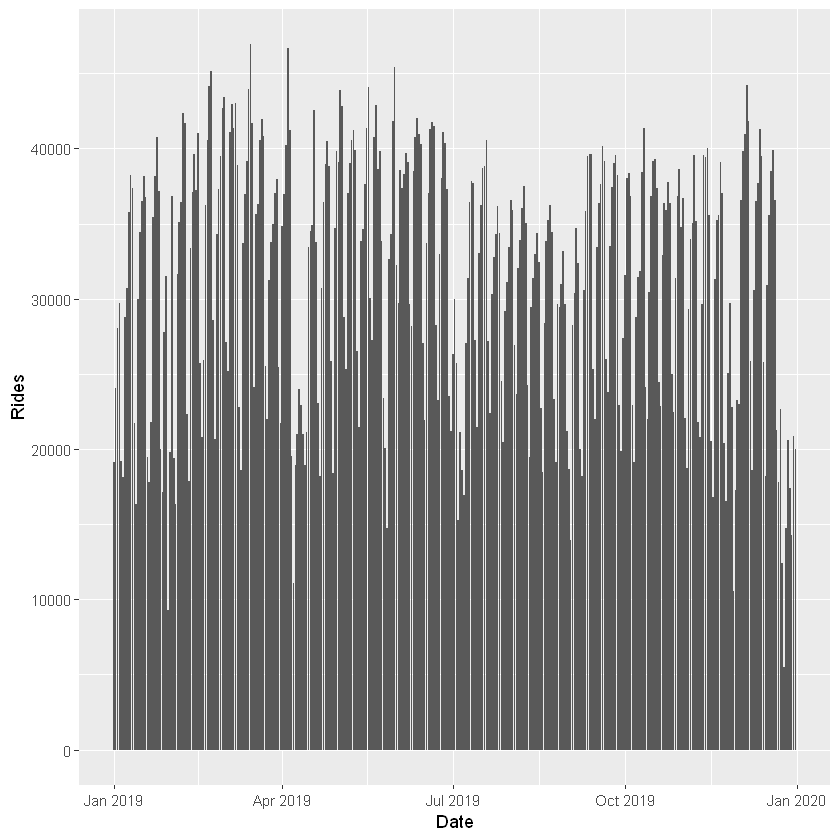

In [13]:
ggplot(noFilter_byDay, aes(x=`Date`, y=`Rides`)) +
  geom_bar(stat="identity")

In [16]:
# Dataframe for the percentage of rides going to/from each community
# NEEDS TO ACCOUNT THE TO/FROM FILTER
# INTEGRATE WITH TAXI
# KEEP IN MIND TO KEEP THE ORDER OF COMMUNITY ARRAY
eachCommunity <- data.frame(data)
comm_range <- 1:77
company <- "All Taxis"
trip <- "To"

if(company != "All Taxis"){
    eachCommunity <- subset(eachCommunity, eachCommunity$Company == company)
}

if(trip == "To"){
    eachCommunity <- aggregate(eachCommunity[,1], by=list(eachCommunity$Dropoff.Community.Area), FUN=length)
}else{
    eachCommunity <- aggregate(eachCommunity[,1], by=list(eachCommunity$Pickup.Community.Area), FUN=length)
}

colnames(eachCommunity) <- c("Community", "Percentage")
#Fill in missing communities with 0's
for(i in 1:77){
    hasCommunity <- FALSE
    for(j in 1:length(eachCommunity[,1])){
        if(eachCommunity[j,1] == i){
            hasCommunity <- TRUE
            break
        }
    }
        
    if(!hasCommunity){
        eachCommunity[nrow(eachCommunity) + 1,] = c(i, 0)
    }
}

eachCommunity <- eachCommunity[order(eachCommunity$Community),]
rownames(eachCommunity) <- 1:nrow(eachCommunity)

#CONVERT COMMUNITY ID TO NAMES
for(i in 1:77){
    eachCommunity[i,1] <- community_list[i]
}

#Table them as percentages
count_sum <- sum(eachCommunity$Percentage)
eachCommunity$Percentage <- eachCommunity$Percentage/count_sum
eachCommunity
#NOTE BAR CHART NEEDS TO SHOW COMMUNITIES ALPHABETICALLY

,Community,Percentage
,<chr>,<dbl>
1,Rogers Park,0.0050103501
2,West Ridge,0.0044669217
3,Uptown,0.0140487731
4,Lincoln Square,0.0063478647
5,North Center,0.0071050147
6,Lake View,0.0437233495
7,Lincoln Park,0.0454346137
8,Near North Side,0.3100637076
9,Edison Park,0.0003348831
